## Install npgamma

The following cell uncommented will install npgamma

In [1]:
# !pip install npgamma

## Imports dependencies for example

In [2]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import urllib.request

from npgamma import calc_gamma_unequal

## Load example data

In [3]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/SimonBiggs/npgamma/master/data_unequal_grid.yml", 
    "data_unequal_grid.yml")

with open('data_unequal_grid.yml', 'r') as file:
    data = yaml.load(file)

## The dimensions of the data need not be equal

In [4]:
x_mephisto = data['x_mephisto']
np.shape(x_mephisto)

(51,)

In [5]:
d_mephisto = data['d_mephisto']
np.shape(d_mephisto)

(101,)

In [6]:
mephisto_dose_grid = data['mephisto_dose_grid']
np.shape(mephisto_dose_grid)

(101, 51)

In [7]:
x_monaco = data['x_monaco']
np.shape(x_monaco)

(31,)

In [8]:
d_monaco = data['d_monaco']
np.shape(d_monaco)

(61,)

In [9]:
monaco_dose_grid = data['monaco_dose_grid']
np.shape(monaco_dose_grid)

(61, 31)

## Calculate Gamma

In [10]:
gamma = calc_gamma_unequal(
    x_mephisto, d_mephisto, mephisto_dose_grid,
    x_monaco, d_monaco, monaco_dose_grid,
    dose_threshold=2, distance_threshold=2
)

## Display output

In [11]:
flat_gamma = np.ravel(gamma)
np.sum(flat_gamma < 1) / len(flat_gamma)

0.87043892120571131

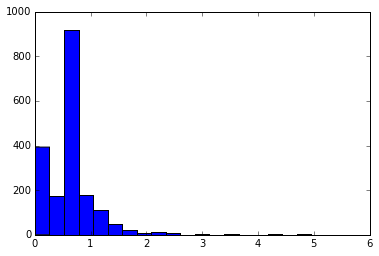

In [12]:
plt.hist(flat_gamma, 20);

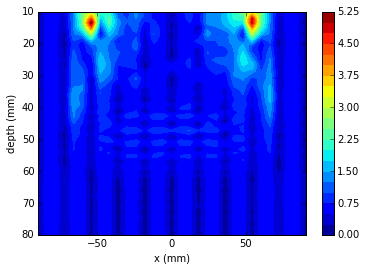

In [13]:
plt.contourf(x_monaco, d_monaco, gamma, 20)
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel('depth (mm)')

## Time taken to calculate

In [14]:
%%timeit

gamma = calc_gamma_unequal(
    x_mephisto, d_mephisto, mephisto_dose_grid,
    x_monaco, d_monaco, monaco_dose_grid,
    dose_threshold=2, distance_threshold=2
)

1 loops, best of 3: 200 ms per loop
